다중회귀

In [1]:
import numpy as np
import pandas as pd
weight = np.array( [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0] )

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung202306/PYTHON/main/data/full.csv')
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [4]:
data = df.to_numpy()
data[:5]

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94]])

In [5]:
# 1.데이터 확보(학습용, 정답)

In [6]:
# 학습을 위해 분할하고 섞기 - 사이킷런 - 분할기
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,weight,random_state=42)

다중회귀 모델

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
poly = PolynomialFeatures()
poly.fit(x_train)
x_train_poly = poly.transform(x_train)
x_test_poly = poly.transform(x_test)

In [9]:
x_train_poly.shape, x_test_poly.shape

((42, 10), (14, 10))

In [10]:
poly.get_feature_names_out()

array(['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [11]:
# 모델
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_poly,y_train) # 학습
# 평가
lr.score(x_train_poly,y_train), lr.score(x_test_poly,y_test)

(0.9903183436982125, 0.971455991159412)

In [12]:
poly = PolynomialFeatures(degree=5)
poly.fit(x_train)
x_train_poly = poly.transform(x_train)
x_test_poly = poly.transform(x_test)
x_train_poly.shape, x_test_poly.shape

((42, 56), (14, 56))

In [13]:
lr = LinearRegression()
lr.fit(x_train_poly,y_train) # 학습
# 평가
lr.score(x_train_poly,y_train), lr.score(x_test_poly,y_test)

(0.9999999999999998, -144.40488780428055)

규제
  - 릿지 Ridge
  - 라쏘 Lasso

In [14]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train_poly,y_train) # 학습
# 평가
ridge.score(x_train_poly,y_train), ridge.score(x_test_poly,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


(0.997068886326891, 0.9149349567883622)

규제알고리즘은 데이터를 표준화 했을때 최적의 상태를 보인다.

In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train_poly)
x_train_poly_scaled = ss.transform(x_train_poly)
x_test_poly_scaled = ss.transform(x_test_poly)

ridge = Ridge()
ridge.fit(x_train_poly_scaled,y_train) # 학습
# 평가
ridge.score(x_train_poly_scaled,y_train), ridge.score(x_test_poly_scaled,y_test)

(0.9896101671037343, 0.9790693977615387)

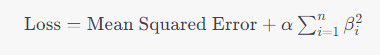

In [ ]:
# mse : 실제값과 예측값의 오차
# 베타는 i번째의 계수값(제약조건의 값)
# 알파 : 규제 강도

In [16]:
# 규제 알고리즘 : 절적한 규제 강도를 찾아야 한다.
# 과적합( 학습, 테스트의 결과가 너무 차이가 날때.. 또는 둘다 너무 낮을때)

In [17]:
alpha_list = [0.001,0.01,0.1,1,10,100]
train_scores = []
test_scores = []
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(x_train_poly_scaled,y_train)
  train_scores.append(ridge.score(x_train_poly_scaled,y_train))
  test_scores.append(ridge.score(x_test_poly_scaled,y_test))